# Section 7: Derivatives and Differentiation

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = np.linspace(-10, 10, 10000) # start, finish, n points

## 59. The Delta Method

$y = x^2 + 2x + 2$:

In [13]:
def f(my_x):
    my_y = my_x**2 + 2*my_x + 2
    return my_y

In [14]:
y = f(x)

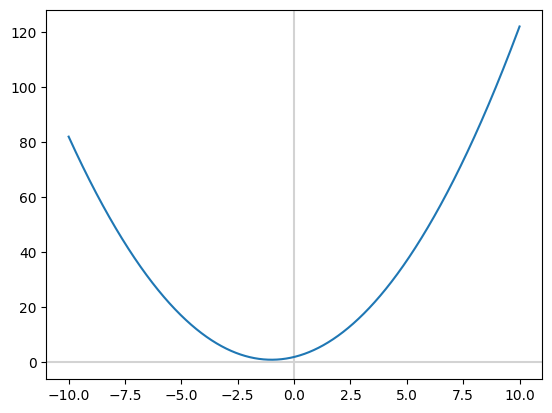

In [16]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
_ = ax.plot(x,y)

Add point P(2,10)

In [19]:
f(2)

10

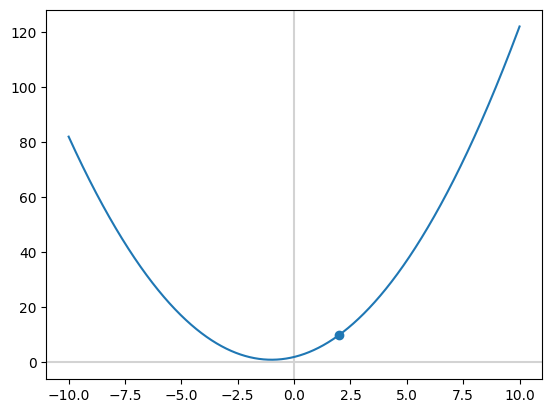

In [18]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
_ = ax.plot(x,y)

Add point Q(5,37)

In [28]:
f(5)

37

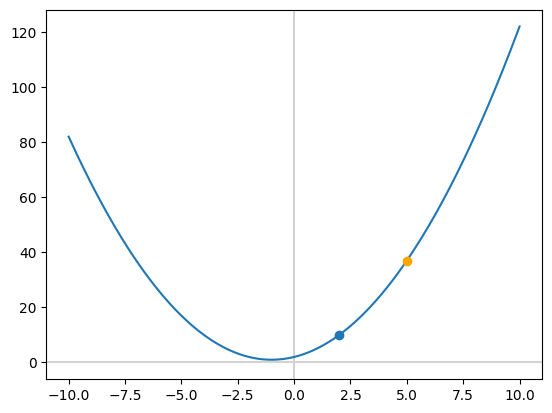

In [29]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(5,37,c='orange',zorder=3)
_ = ax.plot(x,y)

Slope $m$ between points $P$ and $Q$: 
$$m = \frac{\text{change in }y}{\text{change in }x} = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1} = \frac{37-10}{5-2} = \frac{27}{3} = 9$$

In [22]:
m = (37-10)/(5-2)
m

9.0

To plot the line that passes through $P$ and $Q$, we can rearrange the equation of a line $y = mx + b$ to solve for $b$: 
$$b = y - mx$$

In [24]:
b = 37 - m*5
b

-8.0

In [25]:
line_y = m*x + b

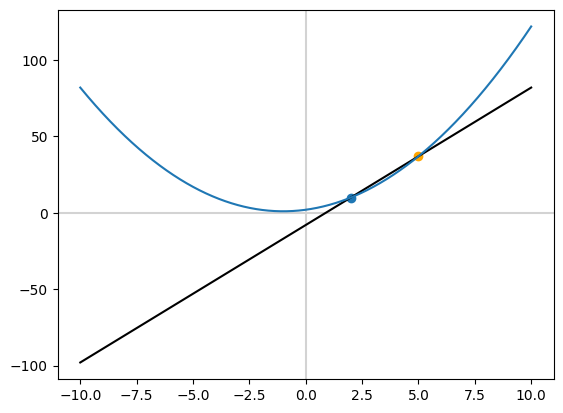

In [27]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(5,37,c='orange')
plt.plot(x, line_y, c='black')
_ = ax.plot(x,y)

The closer $Q$ becomes to $P$, the closer the slope $m$ comes to being the true tangent of the point $P$. Let's demonstrate this with another point $Q$ at $x = 2.1$.

Previously, our $\Delta x$ between $Q$ and $P$ was equal to 3. Now it is much smaller: $$\Delta x = x_2 - x_1 = 2.1 - 2 = 0.1 $$

In [30]:
f(2.1)

10.61

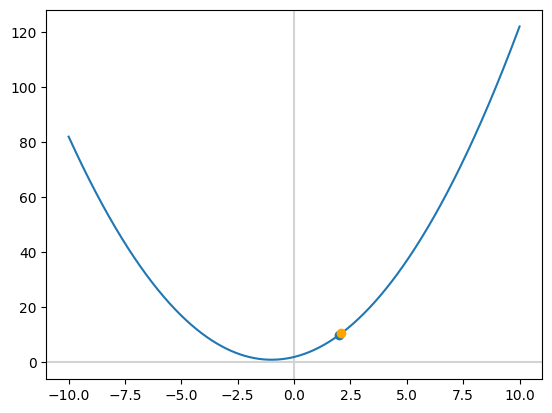

In [31]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(2.1, 10.61, c = 'orange', zorder=3)
_ = ax.plot(x,y)

In [32]:
m = (10.61-10)/(2.1-2)
m

6.099999999999989

In [33]:
b = 10.61-m*2.1
b

-2.199999999999978

In [34]:
line_y = m*x + b

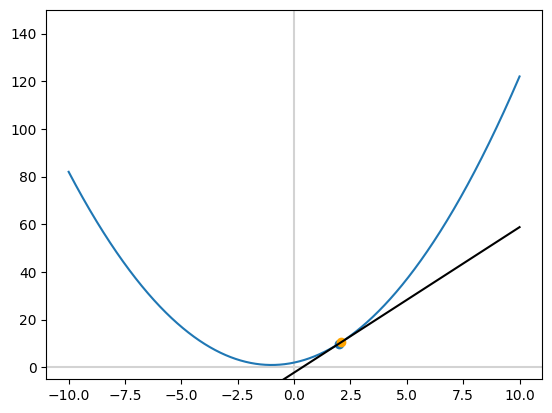

In [35]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(2.1, 10.61, c='orange', zorder=3)
plt.ylim(-5, 150)
plt.plot(x, line_y, c='black', zorder=3)
_ = ax.plot(x,y)

Let's make $\Delta x$ extremely small, 0.000001, to illustrate this:

In [36]:
delta_x = 0.000001
delta_x

1e-06

In [37]:
x1 = 2
y1 = 10

In [38]:
x2 = x1 + delta_x
x2

2.000001

In [39]:
y2 = f(x2)
y2

10.000006000001001

In [40]:
# Slope
m = (y2 - y1)/(x2 - x1)
m

6.000001000088901

**Exercise**: Using the delta method, find the slope of the tangent where $x = -1$.

In [41]:
x1 = -1
y1 = f(x1)
y1

1

In [42]:
x2 = x1 + delta_x
x2

-0.999999

In [43]:
y2 = f(x2)
y2

1.000000000001

In [44]:
m = (y2-y1)/(x2-x1)
m

1.0000889005535828e-06

In [45]:
line_y = m*x + b

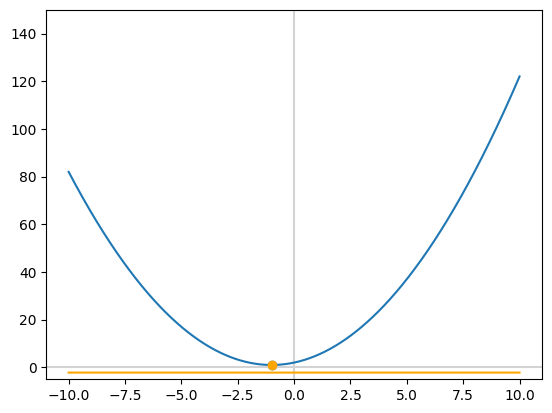

In [46]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(x1, y1)
plt.scatter(x2, y2, c='orange', zorder=3)
plt.ylim(-5, 150)
plt.plot(x, line_y, c='orange', zorder=3)
_ = ax.plot(x,y)

## 60. How derivatives arise from limits

As $Q$ becomes infinitely close to $P$:
* $x_2$ - $x_1$ approaches 0
* In other words, $\Delta x$ approaches 0
* This can be denoted as $\Delta x \to 0$

Using the delta method, we've derived the definition of differentiation from first principles. The derivative of $y$ (denoted $dy$) with respect to $x$ (denoted $dx$) can be represented as: 
$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta x}$$

Expanding $\Delta y$ out to $y_2 - y_1$: 
$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{y_2 - y_1}{\Delta x}$$

Finally, replacing $y_1$ with $f(x)$ and replacing $y_2$ with $f(x + \Delta x)$, we obtain a common representation of differentiation:
$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

In [50]:
# Differentiation demo
def diff_demo(my_f, my_x, my_delta):
    return (my_f(my_x + my_delta) - my_f(my_x)) / my_delta

In [48]:
deltas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

In [ ]:
for delta in deltas:
    print(diff_demo(f, 2, delta))

7.0
6.099999999999994
6.009999999999849
6.000999999999479
6.000100000012054
6.000009999951316
6.000001000927568


In [49]:
for delta in deltas:
    print(diff_demo(f, -1, delta))

1.0
0.10000000000000009
0.009999999999998899
0.001000000000139778
9.99999993922529e-05
1.000000082740371e-05
1.000088900582341e-06
